# Problem Statement:

### The dataset is about to analyze and predict the fares of the flights for the various airlines given. In general, the price of the flight ticket depends upon the following factors like, season, distance, date, airline, class, extras(meal, beverages, etc,) and number of stops (Direct/Connecting flights). Here our problem is to predict the price of the ticket for a particular airline and with other features by analyzing the data from the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sb

from sklearn.preprocessing import LabelEncoder

# Reading the dataset

In [2]:
df = pd.read_excel('Flight_Fare.xlsx')

print('Shape of the Dataset : ',df.shape)
df.head()

Shape of the Dataset :  (10683, 11)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# EDA

## Basic Analysis

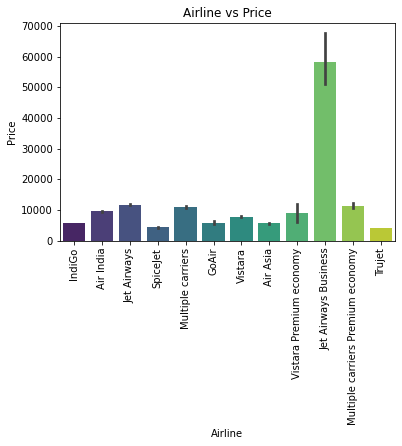

In [3]:
sb.barplot(data = df, x = df.Airline, y = df.Price.sort_values(ascending = True), palette = 'viridis')
plt.title('Airline vs Price')
plt.xticks(rotation='vertical')
plt.show()

## Finding the maximum & minimum fare from in the dataset

In [4]:
# Highest fare in the dataset
print('Highest fare :',df.Price.max())

df[df['Price'] == df['Price'].max()]

Highest fare : 79512


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512


### The highest fare from the dataset is found as, Rs. 79512 which is a "Business class" ticket from Bangalore to New Delhi in "Jet Airways Business" airline

In [5]:
df[df['Price'] == df['Price'].min()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
4066,SpiceJet,21/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 22 Mar,1h 25m,non-stop,No info,1759
4274,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 28 Mar,1h 25m,non-stop,No info,1759
4839,SpiceJet,3/04/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:15 02 Apr,1h 30m,non-stop,No info,1759
10513,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM → HYD,05:45,07:05,1h 20m,non-stop,No info,1759


### The lowest fare from the dataset is found as, Rs. 1759 which is from Mumbai to Hyderabad in "Spicejet" airline

<AxesSubplot:>

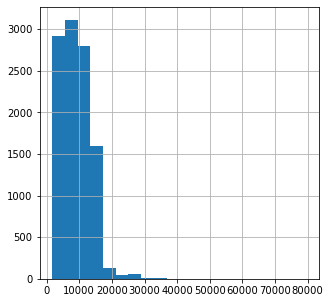

In [6]:
df.Price.hist(bins = 20, figsize = (5,5))

- Here from the above graph, we can see that the number of people who have booked the ticket price below 10,000 is very high comparing to others.
- So the people who prefer low budget flights are higher.

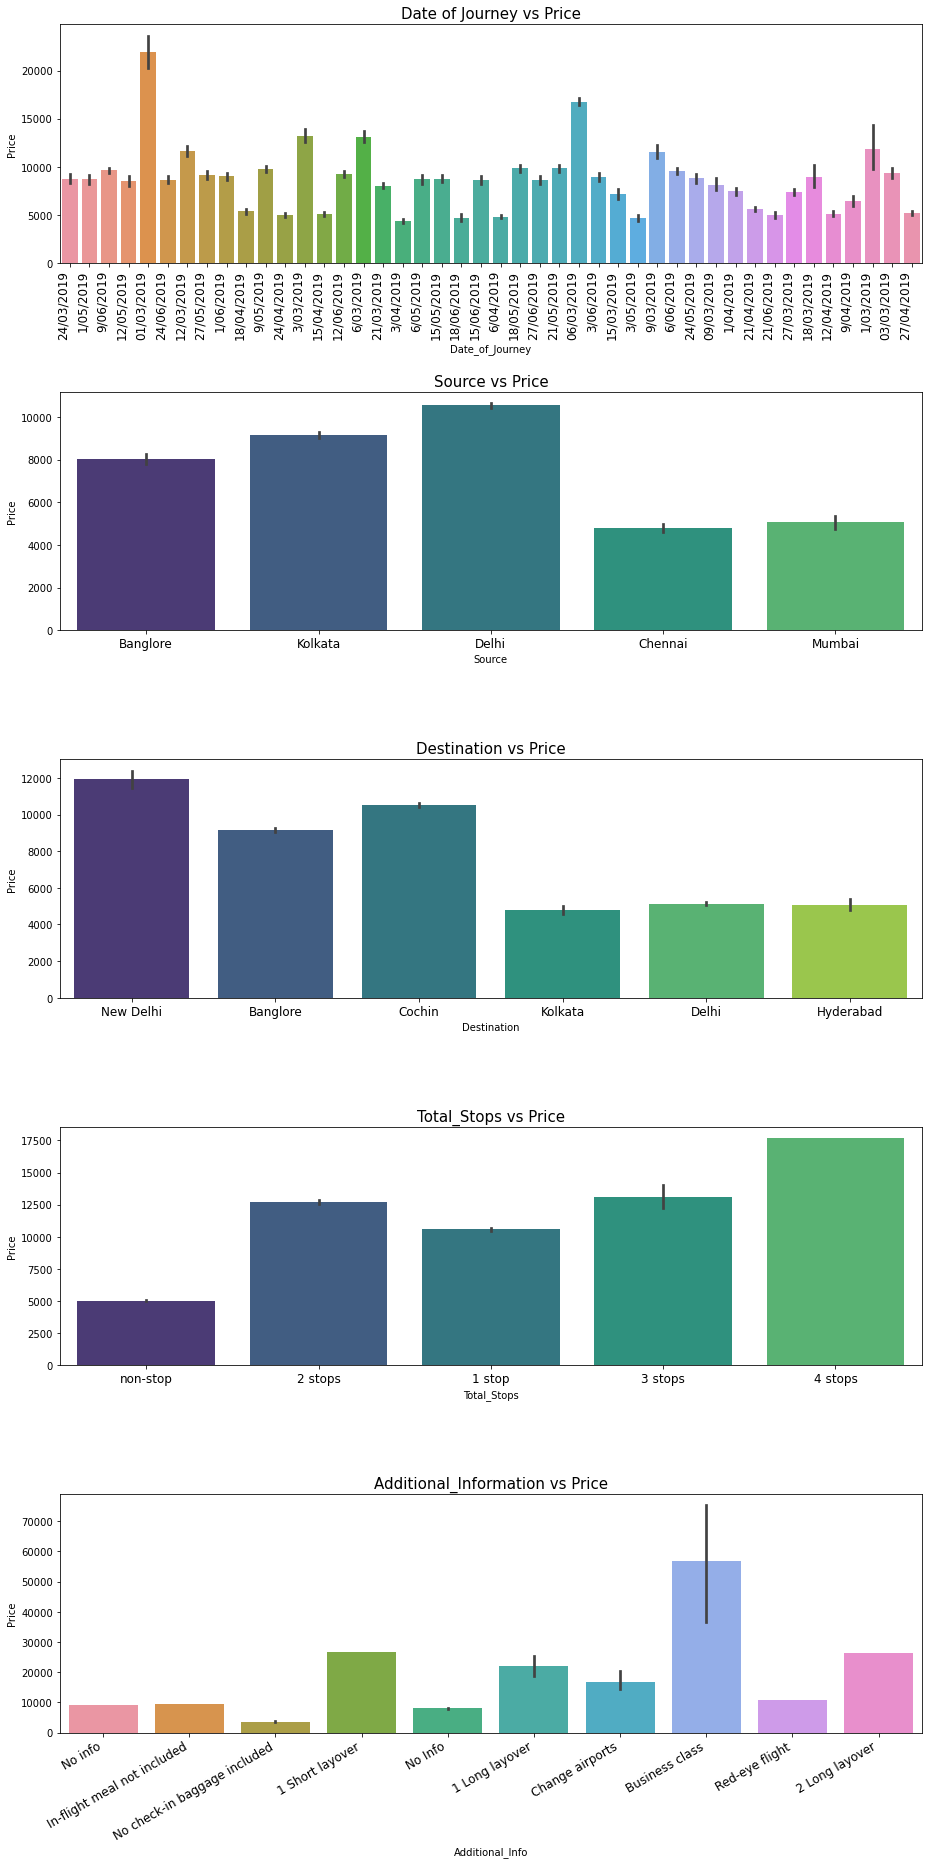

In [7]:
rcParams['figure.figsize'] = (13,26)

fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1)
sb.set_palette(sb.color_palette('viridis'))

ax1 = sb.barplot(data = df, x = df.Date_of_Journey, y = df.Price, ax = ax1)
ax1.set_title('Date of Journey vs Price', size = 15)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90, horizontalalignment = 'right', size = 12)

ax2 = sb.barplot(data = df, x = df.Source, y = df.Price, ax = ax2)
ax2.set_title('Source vs Price', size = 15)
ax2.set_xticklabels(ax2.get_xticklabels(), size = 12)

ax3 = sb.barplot(data = df, x = df.Destination, y = df.Price, ax = ax3)
ax3.set_title('Destination vs Price', size = 15)
ax3.set_xticklabels(ax3.get_xticklabels(), size = 12)

ax4 = sb.barplot(data = df, x = df.Total_Stops, y = df.Price, ax = ax4)
ax4.set_title('Total_Stops vs Price', size = 15)
ax4.set_xticklabels(ax4.get_xticklabels(), size = 12)

ax5 = sb.barplot(data = df, x = df.Additional_Info, y = df.Price, ax = ax5)
ax5.set_title('Additional_Information vs Price', size = 15)
ax5.set_xticklabels(ax5.get_xticklabels(), rotation = 30, horizontalalignment = 'right', size = 12)

plt.tight_layout(h_pad=2)

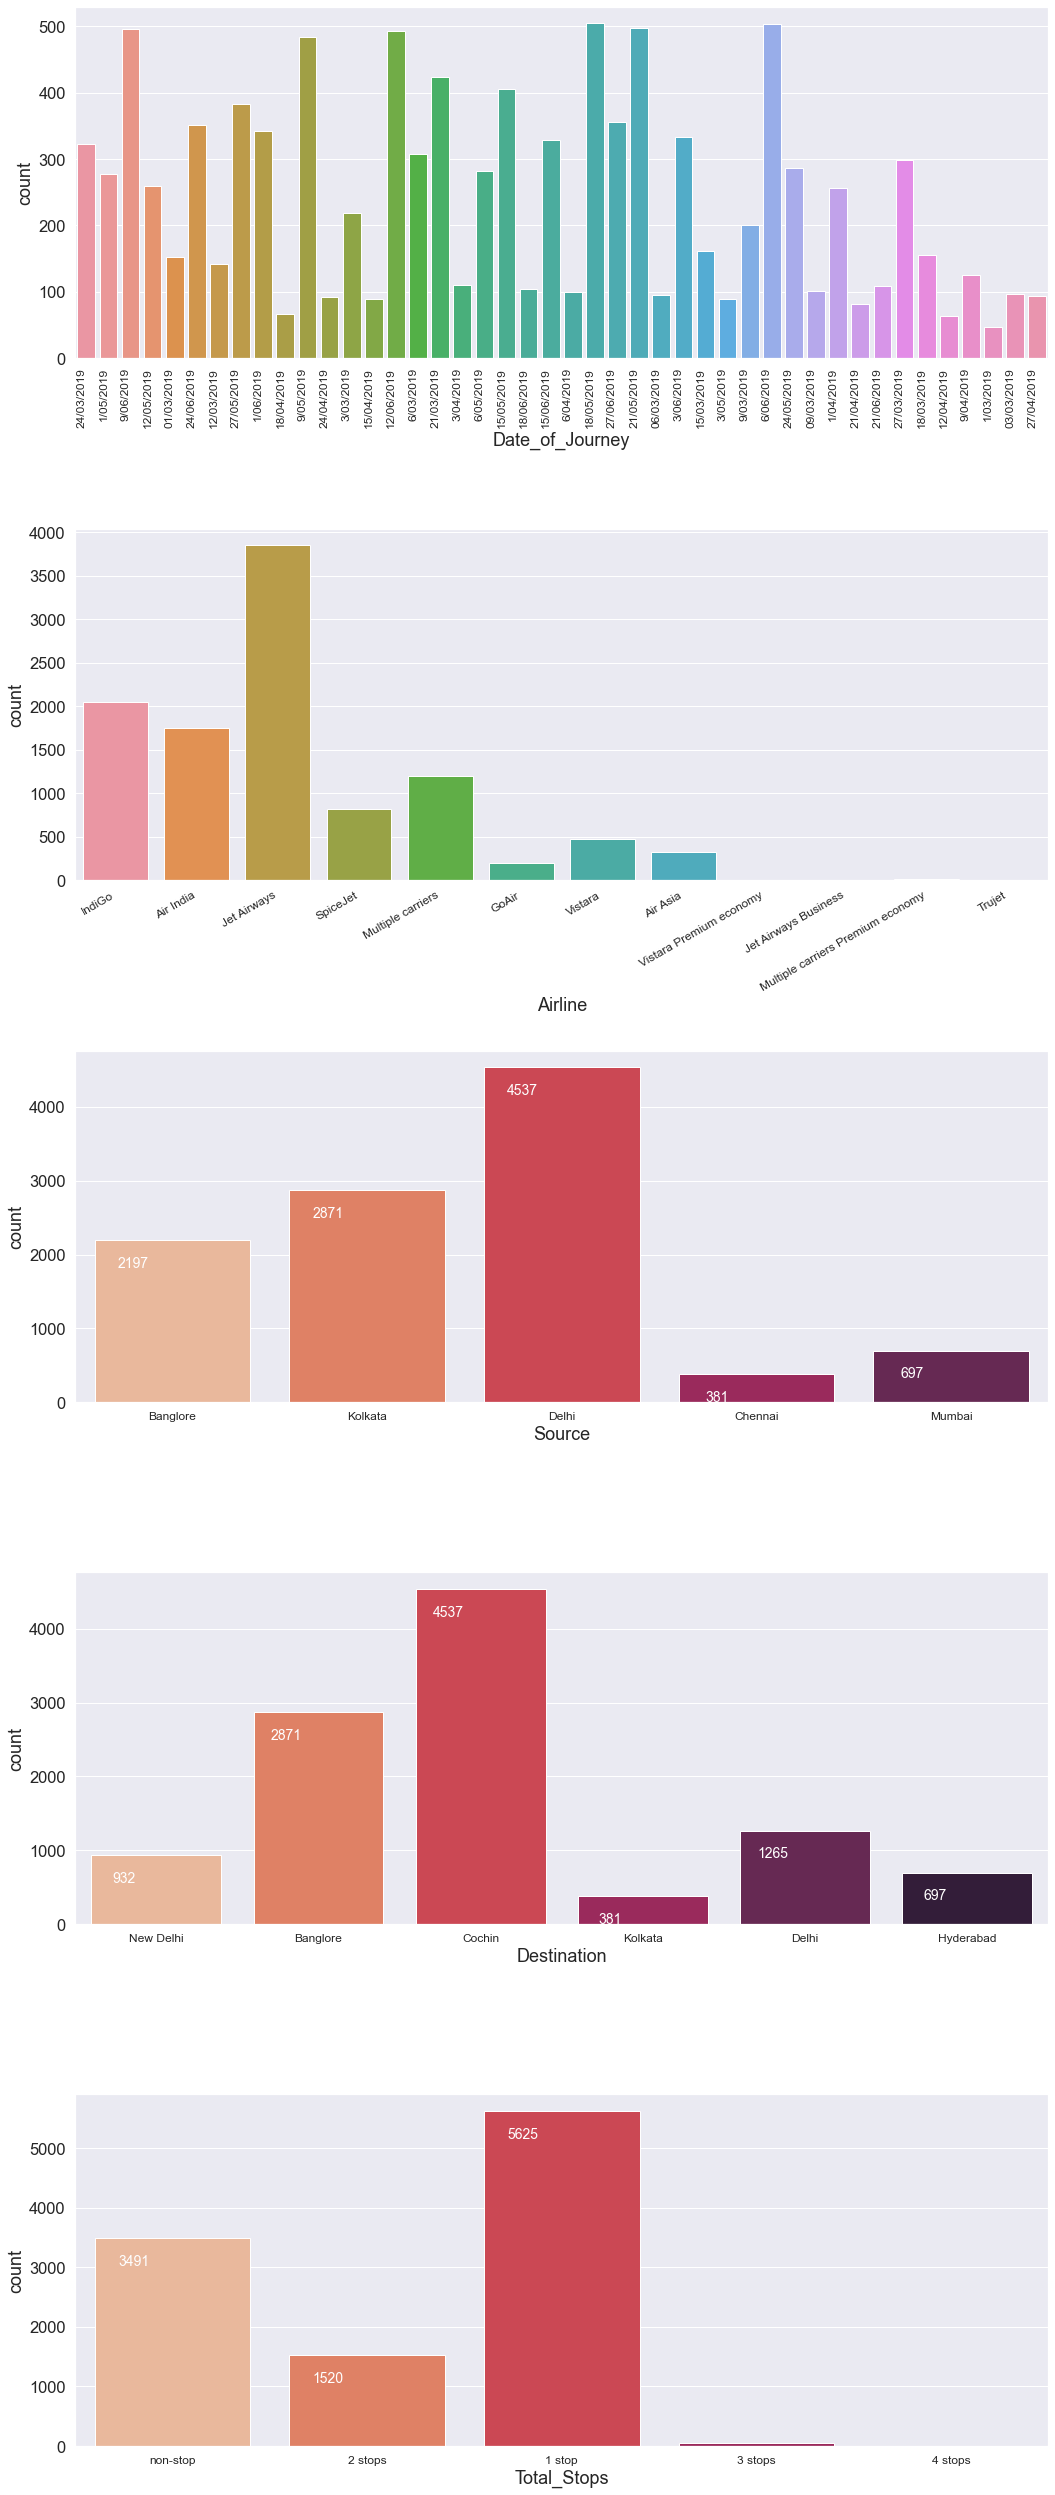

In [8]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

rcParams['figure.figsize'] = (15,35)

sb.set(font_scale = 1.5)
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1)
sb.set_palette(sb.color_palette('rocket_r'))

date = sb.countplot(data = df, x= df.Date_of_Journey, ax = ax1)
date.set_xticklabels(date.get_xticklabels(), rotation = 90, horizontalalignment = 'right', size = 12);

plot = sb.countplot(df.Airline, data = df, ax = ax2)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 30, horizontalalignment = 'right', size = 12);

source = sb.countplot(x = df.Source, data = df, ax = ax3)
source.set_xticklabels(source.get_xticklabels(), size = 12);
for i in ax3.patches:
    value = ax3.annotate(f'\n{i.get_height()}', (i.get_x()+0.2, i.get_height()), ha = 'center', va = 'top', color ='w', size = 14)

dest = sb.countplot(df.Destination, data = df, ax = ax4)
dest.set_xticklabels(dest.get_xticklabels(), size = 12);
for i in ax4.patches:
    value = ax4.annotate(f'\n{i.get_height()}', (i.get_x()+0.2, i.get_height()), ha = 'center', va = 'top', color ='w', size = 14)

stops = sb.countplot(df.Total_Stops, data = df, ax = ax5)
stops.set_xticklabels(stops.get_xticklabels(), size = 12);
for i in ax5.patches:
    value = ax5.annotate(f'\n{i.get_height()}', (i.get_x()+0.2, i.get_height()), ha = 'center', va = 'top', color ='w', size = 14)
    
plt.tight_layout(h_pad=2)

# Data Preprocessing

# Data Cleaning

## Checking for Null values

In [9]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
df.dropna(inplace = True)

In [11]:
df.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route              False
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops        False
Additional_Info    False
Price              False
dtype: bool

## Checking for Duplicate values

In [12]:
duplicates = df[df.duplicated()]

print('Duplicates found = ', df.duplicated(keep = 'last').sum())

duplicates

Duplicates found =  220


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


- There aren't any duplicates

In [13]:
print('No. of Null values present in the data set:\n\n',df.isnull().sum())
print('\nShape of the data set after cleaning :', df.shape)

No. of Null values present in the data set:

 Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Shape of the data set after cleaning : (10682, 11)


## Check for the data types

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


- Except the Price columnn other columns contains categorical values in each
- Hence, we must change them into int type

## Splitting up the columns - Date_of_Journey, Dep_Time & Arr_Time

In [15]:
# Date of Journey
df['Journey_Day'] = pd.to_datetime(df['Date_of_Journey'], format = '%d/%m/%Y').dt.day
df['Journey_Mon'] = pd.to_datetime(df['Date_of_Journey'], format = '%d/%m/%Y').dt.month

# Departure Time
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time'], format = '%H:%M').dt.hour
df['Dep_Min'] = pd.to_datetime(df['Dep_Time'], format = '%H:%M').dt.minute

# Arrival Time
df['Arr_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arr_Min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

# Dropping the duplicates
df = df.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time'], axis = 1)

In [16]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Mon,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


## Splitting the Duration column

In [17]:
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Checking if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # for extracting hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # for extracting minutes from duration

In [18]:
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

df.drop(["Duration"], axis=1, inplace= True)

In [19]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Mon,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Converting hours to mins

In [20]:
durh = df['Duration_hours']
durm = df['Duration_mins']
for i in durh:
    mins = durh * 60
    time = durm + mins
print(time)

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Length: 10682, dtype: int64


In [21]:
deph = df['Dep_Hour']
depm = df['Dep_Min']
for i in deph:
    mins = deph * 60
    time1 = depm + mins
print(time1)

0        1340
1         350
2         565
3        1085
4        1010
         ... 
10678    1195
10679    1245
10680     500
10681     690
10682     655
Length: 10682, dtype: int64


In [22]:
arrh = df['Arr_Hour']
arrm = df['Arr_Min']
for i in arrh:
    mins = arrh * 60
    time2 = arrm + mins
print(time2)

0          70
1         795
2         265
3        1410
4        1295
         ... 
10678    1345
10679    1400
10680     680
10681     850
10682    1155
Length: 10682, dtype: int64


In [23]:
df['Duration_mins'] = time
df['Dep_Min'] = time1
df['Arr_Min'] = time2

df.drop(['Duration_hours', 'Dep_Hour', 'Arr_Hour'], axis = 1, inplace = True)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Mon,Dep_Min,Arr_Min,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1340,70,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,350,795,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,565,265,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,1085,1410,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,1010,1295,285


## Spltting up the route column

In [24]:
df['Route1'] = df['Route'].str.split('→').str[0]
df['Route2'] = df['Route'].str.split('→').str[1]
df['Route3'] = df['Route'].str.split('→').str[2]
df['Route4'] = df['Route'].str.split('→').str[3]
df['Route5'] = df['Route'].str.split('→').str[4]
df.drop(['Route'], axis = 1, inplace = True)
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Mon,Dep_Min,Arr_Min,Duration_mins,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,1340,70,170,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,350,795,445,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,565,265,1140,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,1085,1410,325,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,1010,1295,285,BLR,NAG,DEL,NaN,NaN


#### Filling 'Nan' with 'None' in Route columns

In [25]:
df['Route3'].fillna('None', inplace = True)
df['Route4'].fillna('None', inplace = True)
df['Route5'].fillna('None', inplace = True)

In [26]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
Journey_Day        0
Journey_Mon        0
Dep_Min            0
Arr_Min            0
Duration_mins      0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

# Encoding

## Onehot Encoding

In [27]:
Airline = pd.get_dummies(df['Airline'], drop_first = True)
Source = pd.get_dummies(df['Source'], drop_first = True)
Destination = pd.get_dummies(df['Destination'], drop_first = True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [28]:
print('Feature names in Source :\n', Source.columns)
print('Feature names in Destination :\n', Destination.columns)

Feature names in Source :
 Index(['Chennai', 'Delhi', 'Kolkata', 'Mumbai'], dtype='object')
Feature names in Destination :
 Index(['Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'], dtype='object')


- Here we repeated column names so we need to change the names
- We change the names for Source alone

In [29]:
Source.rename(columns = {'Chennai' : 'S_Chennai', 'Delhi' : 'S_Delhi', 'Kolkata' : 'S_Kolkata', 'Mumbai' : 'S_Mumbai'}, inplace = True)
Source.head()

,S_Chennai,S_Delhi,S_Kolkata,S_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [30]:
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


## Label Encoding

In [31]:
df.select_dtypes(include = ['object'])

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,None,None
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,CCU,BLR,None,None,None
10679,Air India,Kolkata,Banglore,non-stop,No info,CCU,BLR,None,None,None
10680,Jet Airways,Banglore,Delhi,non-stop,No info,BLR,DEL,None,None,None
10681,Vistara,Banglore,New Delhi,non-stop,No info,BLR,DEL,None,None,None


In [32]:
le = LabelEncoder()

df.Route1 = le.fit_transform(df.Route1)
df.Route2 = le.fit_transform(df.Route2)
df.Route3 = le.fit_transform(df.Route3)
df.Route4 = le.fit_transform(df.Route4)
df.Route5 = le.fit_transform(df.Route5)
df.Total_Stops = le.fit_transform(df.Total_Stops)
df.Additional_Info = le.fit_transform(df.Additional_Info)

df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Mon,Dep_Min,Arr_Min,Duration_mins,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,4,8,3897,24,3,1340,70,170,0,13,29,13,5
1,Air India,Kolkata,Banglore,1,8,7662,1,5,350,795,445,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,1,8,13882,9,6,565,265,1140,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,0,8,6218,12,5,1085,1410,325,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,0,8,13302,1,3,1010,1295,285,0,34,8,13,5


In [33]:
df.select_dtypes(exclude = ['object'])

,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Mon,Dep_Min,Arr_Min,Duration_mins,Route1,Route2,Route3,Route4,Route5
0,4,8,3897,24,3,1340,70,170,0,13,29,13,5
1,1,8,7662,1,5,350,795,445,2,25,1,3,5
2,1,8,13882,9,6,565,265,1140,3,32,4,5,5
3,0,8,6218,12,5,1085,1410,325,2,34,3,13,5
4,0,8,13302,1,3,1010,1295,285,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4,8,4107,9,4,1195,1345,150,2,5,29,13,5
10679,4,8,4145,27,4,1245,1400,155,2,5,29,13,5
10680,4,8,7229,27,4,500,680,180,0,13,29,13,5
10681,4,8,12648,1,3,690,850,160,0,13,29,13,5


## Concatenating the onehot encoded columns with the dataframe

In [34]:
data = pd.concat([Airline, Source, Destination, df], axis = 1)

In [35]:
data.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Journey_Day,Journey_Mon,Dep_Min,Arr_Min,Duration_mins,Route1,Route2,Route3,Route4,Route5
0,0,0,1,0,0,0,0,0,0,0,...,24,3,1340,70,170,0,13,29,13,5
1,1,0,0,0,0,0,0,0,0,0,...,1,5,350,795,445,2,25,1,3,5
2,0,0,0,1,0,0,0,0,0,0,...,9,6,565,265,1140,3,32,4,5,5
3,0,0,1,0,0,0,0,0,0,0,...,12,5,1085,1410,325,2,34,3,13,5
4,0,0,1,0,0,0,0,0,0,0,...,1,3,1010,1295,285,0,34,8,13,5


In [36]:
list(data.columns)

['Air India',
 'GoAir',
 'IndiGo',
 'Jet Airways',
 'Jet Airways Business',
 'Multiple carriers',
 'Multiple carriers Premium economy',
 'SpiceJet',
 'Trujet',
 'Vistara',
 'Vistara Premium economy',
 'S_Chennai',
 'S_Delhi',
 'S_Kolkata',
 'S_Mumbai',
 'Cochin',
 'Delhi',
 'Hyderabad',
 'Kolkata',
 'New Delhi',
 'Airline',
 'Source',
 'Destination',
 'Total_Stops',
 'Additional_Info',
 'Price',
 'Journey_Day',
 'Journey_Mon',
 'Dep_Min',
 'Arr_Min',
 'Duration_mins',
 'Route1',
 'Route2',
 'Route3',
 'Route4',
 'Route5']

## Dropping the duplicate columns

In [37]:
data.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace = True)
data.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Journey_Day,Journey_Mon,Dep_Min,Arr_Min,Duration_mins,Route1,Route2,Route3,Route4,Route5
0,0,0,1,0,0,0,0,0,0,0,...,24,3,1340,70,170,0,13,29,13,5
1,1,0,0,0,0,0,0,0,0,0,...,1,5,350,795,445,2,25,1,3,5
2,0,0,0,1,0,0,0,0,0,0,...,9,6,565,265,1140,3,32,4,5,5
3,0,0,1,0,0,0,0,0,0,0,...,12,5,1085,1410,325,2,34,3,13,5
4,0,0,1,0,0,0,0,0,0,0,...,1,3,1010,1295,285,0,34,8,13,5


# Check for the Correlations

In [38]:
data.dtypes

Air India                            uint8
GoAir                                uint8
IndiGo                               uint8
Jet Airways                          uint8
Jet Airways Business                 uint8
Multiple carriers                    uint8
Multiple carriers Premium economy    uint8
SpiceJet                             uint8
Trujet                               uint8
Vistara                              uint8
Vistara Premium economy              uint8
S_Chennai                            uint8
S_Delhi                              uint8
S_Kolkata                            uint8
S_Mumbai                             uint8
Cochin                               uint8
Delhi                                uint8
Hyderabad                            uint8
Kolkata                              uint8
New Delhi                            uint8
Total_Stops                          int32
Additional_Info                      int32
Price                                int64
Journey_Day

- Converted every column to type 'int'

In [39]:
data.corr().Price.sort_values(ascending = True)

Route3                              -0.591306
Total_Stops                         -0.571221
IndiGo                              -0.361070
Route4                              -0.316928
Delhi                               -0.313417
SpiceJet                            -0.296565
Hyderabad                           -0.230755
S_Mumbai                            -0.230755
S_Chennai                           -0.179223
Kolkata                             -0.179223
Journey_Day                         -0.153774
Journey_Mon                         -0.103643
GoAir                               -0.095151
Route2                              -0.087240
Additional_Info                     -0.065463
Vistara                             -0.060654
Route5                              -0.055641
Trujet                              -0.010381
Vistara Premium economy             -0.000454
Dep_Min                              0.005468
S_Kolkata                            0.009358
Multiple carriers Premium economy 

## Checking Normality

### Skewness & Kurtosis

<AxesSubplot:xlabel='Price', ylabel='Density'>

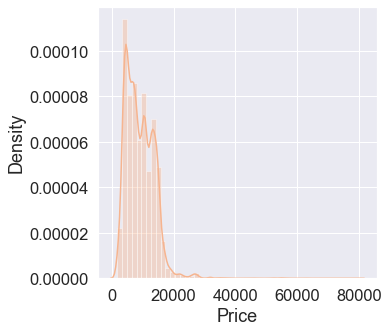

In [40]:
rcParams['figure.figsize'] = (5,5)
sb.distplot(data.Price)

In [41]:
print('No. of columns :', data.shape[1])

data.columns

No. of columns : 33


Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'S_Chennai', 'S_Delhi',
       'S_Kolkata', 'S_Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Mon', 'Dep_Min', 'Arr_Min', 'Duration_mins', 'Route1',
       'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [42]:
from scipy import stats

a = stats.skew(data['Air India'])
a1 = stats.kurtosis(data['Air India'])

b = stats.skew(data['GoAir'])
b1 = stats.kurtosis(data['GoAir'])

c = stats.skew(data['IndiGo'])
c1 = stats.kurtosis(data['IndiGo'])

d = stats.skew(data['Jet Airways'])
d1 = stats.kurtosis(data['Jet Airways'])

e = stats.skew(data['Jet Airways Business'])
e1 = stats.kurtosis(data['Jet Airways Business'])

f = stats.skew(data['Multiple carriers'])
f1 = stats.kurtosis(data['Multiple carriers'])

g = stats.skew(data['Multiple carriers Premium economy'])
g1 = stats.kurtosis(data['Multiple carriers Premium economy'])

h = stats.skew(data['SpiceJet'])
h1 = stats.kurtosis(data['SpiceJet'])

i = stats.skew(data['Trujet'])
i1 = stats.kurtosis(data['Trujet'])

j = stats.skew(data['Vistara'])
j1 = stats.kurtosis(data['Vistara'])

k = stats.skew(data['Vistara Premium economy'])
k1 = stats.kurtosis(data['Vistara Premium economy'])

l = stats.skew(data['S_Chennai'])
l1 = stats.kurtosis(data['S_Chennai'])

m = stats.skew(data['S_Delhi'])
m1 = stats.kurtosis(data['S_Delhi'])

n = stats.skew(data['S_Kolkata'])
n1 = stats.kurtosis(data['S_Kolkata'])

o = stats.skew(data['S_Mumbai'])
o1 = stats.kurtosis(data['S_Mumbai'])

p = stats.skew(data['Cochin'])
p1 = stats.kurtosis(data['Cochin'])

q = stats.skew(data['Delhi'])
q1 = stats.kurtosis(data['Delhi'])

r = stats.skew(data['Hyderabad'])
r1 = stats.kurtosis(data['Hyderabad'])

s = stats.skew(data['Kolkata'])
s1 = stats.kurtosis(data['Kolkata'])

t = stats.skew(data['New Delhi'])
t1 = stats.kurtosis(data['New Delhi'])

u = stats.skew(data['Total_Stops'])
u1 = stats.kurtosis(data['Total_Stops'])

v = stats.skew(data['Additional_Info'])
v1 = stats.kurtosis(data['Additional_Info'])

w = stats.skew(data['Price'])
w1 = stats.kurtosis(data['Price'])

x = stats.skew(data['Journey_Day'])
x1 = stats.kurtosis(data['Journey_Day'])

y = stats.skew(data['Journey_Mon'])
y1 = stats.kurtosis(data['Journey_Mon'])

z = stats.skew(data['Dep_Min'])
z1 = stats.kurtosis(data['Dep_Min'])

aa = stats.skew(data['Arr_Min'])
aa1 = stats.kurtosis(data['Arr_Min'])

bb = stats.skew(data['Duration_mins'])
bb1 = stats.kurtosis(data['Duration_mins'])

cc = stats.skew(data['Route1'])
cc1 = stats.kurtosis(data['Route1'])

dd = stats.skew(data['Route2'])
dd1 = stats.kurtosis(data['Route2'])

ee = stats.skew(data['Route3'])
ee1 = stats.kurtosis(data['Route3'])

ff = stats.skew(data['Route4'])
ff1 = stats.kurtosis(data['Route4'])

gg = stats.skew(data['Route5'])
gg1 = stats.kurtosis(data['Route5'])

In [43]:
stats = pd.DataFrame({
    'Features' : ['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
                  'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
                  'Trujet', 'Vistara', 'Vistara Premium economy', 'S_Chennai', 'S_Delhi',
                  'S_Kolkata', 'S_Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
                  'New Delhi', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
                  'Journey_Mon', 'Dep_Min', 'Arr_Min', 'Duration_mins', 'Route1',
                  'Route2', 'Route3', 'Route4', 'Route5'],
    'Skewness' : [a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u, v, w, x, y, z, aa, bb, cc, dd, ee, ff, gg],
    'Kurtosis' : [a1, b1, c1, d1, e1, f1, g1, h1, i1, j1, k1, l1, m1, n1, o1, p1, q1, r1, s1, t1, u1, v1, w1, x1, y1, z1,
                  aa1, bb1, cc1, dd1, ee1, ff1, gg1]
})

stats

,Features,Skewness,Kurtosis
0,Air India,1.815647,1.296573
1,GoAir,7.216672,50.080353
2,IndiGo,1.562382,0.441036
3,Jet Airways,0.581861,-1.661438
4,Jet Airways Business,42.158438,1775.333895
5,Multiple carriers,2.461203,4.057519
6,Multiple carriers Premium economy,28.612821,816.693526
7,SpiceJet,3.184589,8.141608
8,Trujet,103.339248,10677.000094
9,Vistara,4.398588,17.347573


# Outliers

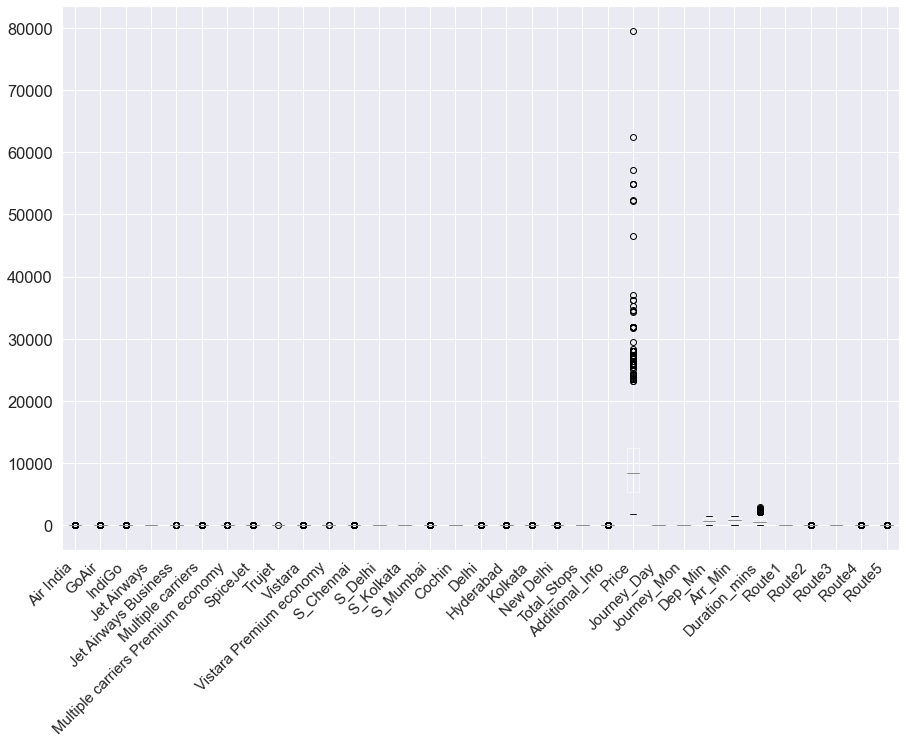

In [44]:
data.boxplot(figsize = (15,10))
plt.xticks(rotation = 45, horizontalalignment = 'right', size = 15);

<AxesSubplot:xlabel='Price'>

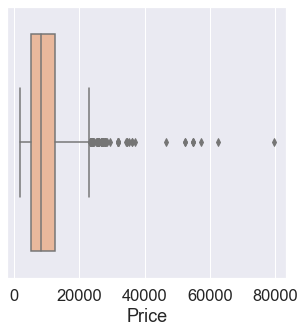

In [45]:
rcParams['figure.figsize']=(5,5)
sb.boxplot(x = data.Price)

## Split the Predictors and target

In [46]:
print('Shape =', data.shape)
print('\nList of Columns :\n', data.columns)

Shape = (10682, 33)

List of Columns :
 Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'S_Chennai', 'S_Delhi',
       'S_Kolkata', 'S_Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Mon', 'Dep_Min', 'Arr_Min', 'Duration_mins', 'Route1',
       'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')


In [47]:
col = "Price"
index = data.columns.get_loc(col)
print("Index of the {} column is : {}".format(col, index))

Index of the Price column is : 22


In [48]:
x = data.iloc[:,np.r_[0:22, 23:33]]
y = data.Price

In [49]:
print('Shape of X :', x.shape)
print('\nList of columns in X :\n', x.columns)

Shape of X : (10682, 32)

List of columns in X :
 Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'S_Chennai', 'S_Delhi',
       'S_Kolkata', 'S_Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Total_Stops', 'Additional_Info', 'Journey_Day',
       'Journey_Mon', 'Dep_Min', 'Arr_Min', 'Duration_mins', 'Route1',
       'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')


In [50]:
y.shape

(10682,)

# Feature Selection

In [51]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=10)
model.fit(x,y)

RandomForestRegressor(random_state=10)

In [52]:
model.feature_importances_

array([5.02836556e-03, 2.56248748e-03, 5.10497968e-03, 5.78702367e-02,
       5.90053616e-02, 1.67583965e-02, 5.91932352e-04, 2.79348693e-03,
       1.42302190e-06, 2.21759037e-03, 4.62695801e-05, 4.56697047e-04,
       2.18308192e-03, 1.90797554e-03, 1.69861648e-03, 1.84994678e-03,
       3.19652019e-04, 1.48618129e-03, 4.85483044e-04, 1.13460514e-02,
       1.17038486e-02, 9.28514802e-02, 9.19156802e-02, 4.67278406e-02,
       2.87672360e-02, 2.99241518e-02, 4.46633153e-01, 1.32861627e-02,
       3.34482215e-02, 1.60023559e-02, 1.46128922e-02, 4.12761824e-04])

In [53]:
fi = pd.DataFrame([model.feature_importances_, x.columns]).T
fi.sort_values(0, ascending=False).reset_index(drop=True)

,0,1
0,0.446633,Duration_mins
1,0.092851,Additional_Info
2,0.091916,Journey_Day
3,0.059005,Jet Airways Business
4,0.05787,Jet Airways
5,0.046728,Journey_Mon
6,0.033448,Route2
7,0.029924,Arr_Min
8,0.028767,Dep_Min
9,0.016758,Multiple carriers


## We can drop some of the features with least importance here

In [54]:
x.drop(['Trujet', 'Vistara Premium economy', 'Delhi'], axis = 1, inplace = True)

In [55]:
print('Shape of X :', x.shape)
print('\nList of columns in X :\n', x.columns)

Shape of X : (10682, 29)

List of columns in X :
 Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'S_Chennai', 'S_Delhi', 'S_Kolkata', 'S_Mumbai', 'Cochin',
       'Hyderabad', 'Kolkata', 'New Delhi', 'Total_Stops', 'Additional_Info',
       'Journey_Day', 'Journey_Mon', 'Dep_Min', 'Arr_Min', 'Duration_mins',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')


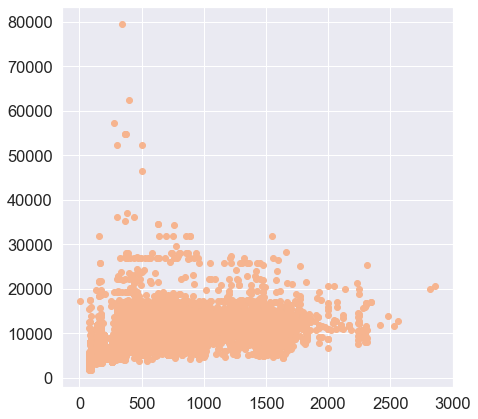

In [56]:
# Duration_mins is highly correlated with the Price

rcParams['figure.figsize'] = (7,7)
plt.scatter(x.Duration_mins, y);

# Model Selection

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression      # Linear Regression
from sklearn.linear_model import Lasso                 # Lasso Regression
from sklearn.tree import DecisionTreeRegressor         # Decision Tree
from sklearn.ensemble import RandomForestRegressor     # Random Forest
from xgboost import XGBRegressor                       # XG Boost
from sklearn.neighbors import KNeighborsRegressor      # KNN
from sklearn.svm import SVR                            # Support Vector Machine

## Train Test Split

In [58]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [59]:
print('X Train :', x_train.shape)
print('X Test :', x_test.shape)
print('Y Train :', y_train.shape)
print('Y Test :', y_test.shape)

X Train : (8545, 29)
X Test : (2137, 29)
Y Train : (8545,)
Y Test : (2137,)


## Linear Regression

In [60]:
linear = LinearRegression()
linear.fit(x_train, y_train)
y_lpredict = linear.predict(x_test)
y_lpredict1 = linear.predict(x_train)

print('Linear Test score :',r2_score(y_test, y_lpredict))
print('Linear Train score :',r2_score(y_train, y_lpredict1))
print('\nMAE :', mean_absolute_error(y_test, y_lpredict))
print('MSE :', mean_squared_error(y_test, y_lpredict))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_lpredict)))

Linear Test score : 0.6304267629104143
Linear Train score : 0.6799656304664143

MAE : 1854.208775691854
MSE : 8671361.52548864
RMSE : 2944.7175629402286


In [61]:
data_predict = pd.DataFrame({
    'Actual_Price' : y_test,
    'Predicted_Price' : y_lpredict
})
data_predict

,Actual_Price,Predicted_Price
10507,14781,12825.083141
7705,5636,6116.885046
7700,3597,3277.103290
1437,16757,14844.169104
8884,4804,5049.850285
...,...,...
6391,3943,4210.254396
9273,4804,3861.511312
6199,8971,10199.818435
10037,9663,10358.118135


In [62]:
data_predict['Error'] = data_predict['Actual_Price'] - data_predict['Predicted_Price']
data_predict

,Actual_Price,Predicted_Price,Error
10507,14781,12825.083141,1955.916859
7705,5636,6116.885046,-480.885046
7700,3597,3277.103290,319.896710
1437,16757,14844.169104,1912.830896
8884,4804,5049.850285,-245.850285
...,...,...,...
6391,3943,4210.254396,-267.254396
9273,4804,3861.511312,942.488688
6199,8971,10199.818435,-1228.818435
10037,9663,10358.118135,-695.118135


## Random Forest

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [65]:
rf = RandomForestRegressor(random_state = 1)
rf.fit(x_train,y_train)
y_rfpredict=rf.predict(x_test)
y_rfpredict1=rf.predict(x_train)

print('RF Test score :',r2_score(y_test, y_rfpredict))
print('RF Train score :',r2_score(y_train, y_rfpredict1))
print('\nMAE :', mean_absolute_error(y_test, y_rfpredict))
print('MSE :', mean_squared_error(y_test, y_rfpredict))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_rfpredict)))

RF Test score : 0.9059926402059352
RF Train score : 0.9814472987727115

MAE : 621.4915612730352
MSE : 2140403.249797407
RMSE : 1463.0117052837982


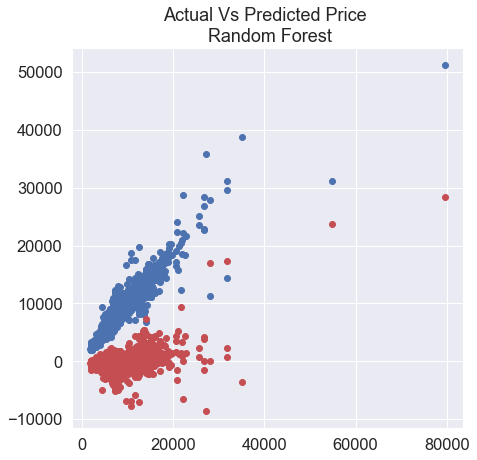

## Lasso

In [68]:
lasso = Lasso()
lasso.fit(x_train,y_train)

y_lapredict=lasso.predict(x_test)
y_lapredict1=lasso.predict(x_train)

print('Lasso Test score :',r2_score(y_test, y_lapredict))
print('Lasso Train score :',r2_score(y_train, y_lapredict1))
print('\nMAE :', mean_absolute_error(y_test, y_lapredict))
print('MSE :', mean_squared_error(y_test, y_lapredict))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_lapredict)))

Lasso Test score : 0.6772974052495238
Lasso Train score : 0.6666454691519043

MAE : 1781.0312407630347
MSE : 7347442.626141954
RMSE : 2710.616650532117


## Decision Tree

In [69]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

y_dtpredict=dt.predict(x_test)
y_dtpredict1=dt.predict(x_train)

print('DT Test score :',r2_score(y_test, y_dtpredict))
print('DT Train score :',r2_score(y_train, y_dtpredict1))
print('\nMAE :', mean_absolute_error(y_test, y_dtpredict))
print('MSE :', mean_squared_error(y_test, y_dtpredict))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_dtpredict)))

DT Test score : 0.8405911731569269
DT Train score : 0.996271764864508

MAE : 683.7982374044611
MSE : 3629494.241394998
RMSE : 1905.1231564901514


## KNN

In [70]:
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(x_train, y_train)

y_knn_predict = knn.predict(x_test)
y_knn_predict1 = knn.predict(x_train)

print('KNN Test score :',r2_score(y_test, y_knn_predict))
print('KNN Train score :',r2_score(y_train, y_knn_predict1))
print('\nMAE :', mean_absolute_error(y_test, y_knn_predict))
print('MSE :', mean_squared_error(y_test, y_knn_predict))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_knn_predict)))

KNN Test score : 0.5654681309154083
KNN Train score : 0.72745135798013

MAE : 1685.082077678989
MSE : 9893623.50742162
RMSE : 3145.4130901078192


## XG Boost

In [71]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

y_xgb_predict=xgb.predict(x_test)
y_xgb_predict1=xgb.predict(x_train)

print('Test score :',r2_score(y_test, y_xgb_predict))
print('Train score :',r2_score(y_train, y_xgb_predict1))
print('\nMAE :', mean_absolute_error(y_test, y_xgb_predict))
print('MSE :', mean_squared_error(y_test, y_xgb_predict))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_xgb_predict)))

Test score : 0.9144523749362657
Train score : 0.968122818602833

MAE : 699.2457783207694
MSE : 1947788.0785077359
RMSE : 1395.6317847153439


## SVM

In [72]:
svr = SVR(C = 10, gamma = 10, kernel = 'linear')
svr.fit(x_train,y_train)

y_svr_predict=svr.predict(x_test)
y_svr_predict1=svr.predict(x_train)

print('SVM Test score :',r2_score(y_test, y_svr_predict))
print('SVM Train score :',r2_score(y_train, y_svr_predict1))
print('\nMAE :', mean_absolute_error(y_test, y_svr_predict))
print('MSE :', mean_squared_error(y_test, y_svr_predict))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_svr_predict)))

SVM Test score : 0.5497241062580837
SVM Train score : 0.571760024082032

MAE : 1776.9944781122629
MSE : 10252090.776529582
RMSE : 3201.888626503049


# Comparing all models

In [90]:
details = {
    'Algorithms' : ['Random Forest', 'XG Boost', 'Decision Tree', 'Lasso Regression', 'Linear Regression', 'KNN', 'SVM'],
    
    'Test Score' : [ "{:0.1f}".format(r2_score(y_test, y_rfpredict)*100,),
                    "{:0.1f}".format(r2_score(y_test, y_xgb_predict)*100),
                    "{:0.1f}".format(r2_score(y_test, y_dtpredict)*100),
                    "{:0.1f}".format(r2_score(y_test, y_lapredict)*100),63.0,
                    "{:0.1f}".format(r2_score(y_test, y_knn_predict)*100),
                    "{:0.1f}".format(r2_score(y_test, y_svr_predict)*100)],
    
    'Train Score' : ["{:0.1f}".format(r2_score(y_train, y_rfpredict1)*100),
                    "{:0.1f}".format(r2_score(y_train, y_xgb_predict1)*100),
                    "{:0.1f}".format(r2_score(y_train, y_dtpredict1)*100),
                    "{:0.1f}".format(r2_score(y_train, y_lapredict1)*100),
                     68.0,
                    "{:0.1f}".format(r2_score(y_train, y_knn_predict1)*100),
                    "{:0.1f}".format(r2_score(y_train, y_svr_predict1)*100)],
    
    'RMSE' : ["{:0.1f}".format(np.sqrt(mean_squared_error(y_test, y_rfpredict))/100),
                    "{:0.1f}".format(np.sqrt(mean_squared_error(y_test, y_xgb_predict))/100),
                    "{:0.1f}".format(np.sqrt(mean_squared_error(y_test, y_dtpredict))/100),
                    "{:0.1f}".format(np.sqrt(mean_squared_error(y_test, y_lapredict))/100),29.4,
                    "{:0.1f}".format(np.sqrt(mean_squared_error(y_test, y_knn_predict))/100),
                    "{:0.1f}".format(np.sqrt(mean_squared_error(y_test, y_svr_predict))/100)]
}

compare = pd.DataFrame(details)
compare

,Algorithms,Test Score,Train Score,RMSE
0,Random Forest,90.6,98.1,14.6
1,XG Boost,91.4,96.8,14.0
2,Decision Tree,84.1,99.6,19.1
3,Lasso Regression,67.7,66.7,27.1
4,Linear Regression,63.0,68.0,29.4
5,KNN,56.5,72.7,31.5
6,SVM,55.0,57.2,32.0


## Here we choose the model random forest since it gives good scores for both test and train

### Hyperparameter Tuning with Random Forest using RandomSearchCV

In [92]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [93]:
random = {
    'bootstrap' : ['True', 'False'],
    'n_jobs' : [-1, 1],
    'max_features' : ['auto', 'sqrt'],
    'max_depth': [5, 10],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10],
    'n_estimators': [10, 50, 100],
    'random_state' : [2,10,40,100]
}
# 2*2*2*2*3*2*3*5 = 1152 Combinations

In [94]:
rscv = RandomizedSearchCV(estimator = model, param_distributions = random, cv = 3, verbose = 2)  # GridSearchCV helps show all the combinations
rscv.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=100; total time=  26.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=10),
                   param_distributions={'bootstrap': ['True', 'False'],
                                        'max_depth': [5, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [8, 10],
                                        'n_estimators': [10, 50, 100],
                                        'n_jobs': [-1, 1],
                                        'random_state': [2, 10, 40, 100]},
                   verbose=2)

In [95]:
rscv.best_params_

{'random_state': 40,
 'n_jobs': -1,
 'n_estimators': 10,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': 'False'}

In [96]:
rf = RandomForestRegressor(random_state = 40, n_jobs = -1, n_estimators = 10, min_samples_split = 10,
                          min_samples_leaf = 3, max_features = 'auto', max_depth = 10, bootstrap = False)
rf.fit(x_train,y_train)
y_predict=rf.predict(x_test)
y_predict1=rf.predict(x_train)

print('RF Test score :',r2_score(y_test, y_predict))
print('RF Train score :',r2_score(y_train, y_predict1))
print('\nMAE :', mean_absolute_error(y_test, y_predict))
print('MSE :', mean_squared_error(y_test, y_predict))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_predict)))

RF Test score : 0.8607996439298213
RF Train score : 0.8855918815927918

MAE : 891.4055998518202
MSE : 3169378.3886522623
RMSE : 1780.2748070599275


### Hyperparameter tuning with GridSearchCV

In [97]:
grid = {
    'max_features' : ['auto', 'sqrt'],
    'max_depth': [5, 10],
    'min_samples_split': [8, 10],
    'n_estimators': [10, 50, 100],
    'random_state' : [2,10,40]
}
# 2*2*2*2*3*3 = 72 Combinations

In [98]:
gscv = GridSearchCV(estimator = model, param_grid = grid, cv = 3, verbose = 2)  # GridSearchCV helps show all the combinations
gscv.fit(x_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=10, random_state=2; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=10, random_state=2; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=10, random_state=2; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=10, random_state=10; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=10, random_state=10; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=10, random_state=10; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=10, random_state=40; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=10, random_state=40; total time=   0.1s
[CV] END max_depth=5,

[CV] END max_depth=5, max_features=sqrt, min_samples_split=8, n_estimators=50, random_state=40; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=8, n_estimators=100, random_state=2; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=8, n_estimators=100, random_state=2; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=8, n_estimators=100, random_state=2; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=8, n_estimators=100, random_state=10; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=8, n_estimators=100, random_state=10; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=8, n_estimators=100, random_state=10; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=8, n_estimators=100, random_state=40; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=8, n_estimators=1

[CV] END max_depth=10, max_features=auto, min_samples_split=10, n_estimators=10, random_state=40; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_split=10, n_estimators=10, random_state=40; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_split=10, n_estimators=50, random_state=2; total time=   1.1s
[CV] END max_depth=10, max_features=auto, min_samples_split=10, n_estimators=50, random_state=2; total time=   1.1s
[CV] END max_depth=10, max_features=auto, min_samples_split=10, n_estimators=50, random_state=2; total time=   1.1s
[CV] END max_depth=10, max_features=auto, min_samples_split=10, n_estimators=50, random_state=10; total time=   1.1s
[CV] END max_depth=10, max_features=auto, min_samples_split=10, n_estimators=50, random_state=10; total time=   1.0s
[CV] END max_depth=10, max_features=auto, min_samples_split=10, n_estimators=50, random_state=10; total time=   1.2s
[CV] END max_depth=10, max_features=auto, min_samples_split=10, n_e

[CV] END max_depth=10, max_features=sqrt, min_samples_split=10, n_estimators=100, random_state=40; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=10, n_estimators=100, random_state=40; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=10, n_estimators=100, random_state=40; total time=   0.7s


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=10),
             param_grid={'max_depth': [5, 10], 'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [8, 10],
                         'n_estimators': [10, 50, 100],
                         'random_state': [2, 10, 40]},
             verbose=2)

In [99]:
gscv.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_split': 8,
 'n_estimators': 10,
 'random_state': 40}

In [100]:
rfgrid = RandomForestRegressor(random_state = 40, n_estimators = 10, min_samples_split = 8,
                                max_features = 'auto', max_depth = 10)
rfgrid.fit(x_train,y_train)
y_predict=rfgrid.predict(x_test)
y_predict1=rfgrid.predict(x_train)

print('Test score :',r2_score(y_test, y_predict))
print('Train score :',r2_score(y_train, y_predict1))
print('\nMAE :', mean_absolute_error(y_test, y_predict))
print('MSE :', mean_squared_error(y_test, y_predict))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_predict)))

Test score : 0.864859007935438
Train score : 0.9043627040918634

MAE : 885.1053443607913
MSE : 3076952.902724711
RMSE : 1754.1245402549705


## Finally

In [105]:
rf = RandomForestRegressor(random_state = 1)
rf.fit(x_train,y_train)
y_rfpredict=rf.predict(x_test)
y_rfpredict1=rf.predict(x_train)

print('RF Test score :',r2_score(y_test, y_rfpredict))
print('RF Train score :',r2_score(y_train, y_rfpredict1))
print('\nMAE :', mean_absolute_error(y_test, y_rfpredict))
print('MSE :', mean_squared_error(y_test, y_rfpredict))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_rfpredict)))

RF Test score : 0.9059926402059352
RF Train score : 0.9814472987727115

MAE : 621.4915612730352
MSE : 2140403.249797407
RMSE : 1463.0117052837982


In [106]:
rf_predict = pd.DataFrame({
    'Actual_Price' : y_test,
    'Predicted_Price' : y_rfpredict
})

rf_predict['Error'] = rf_predict['Actual_Price'] - rf_predict['Predicted_Price']

rf_predict

,Actual_Price,Predicted_Price,Error
2519,10844,10347.240000,496.760000
10237,3383,4038.310000,-655.310000
6949,6795,7710.378333,-915.378333
5415,14714,16824.230000,-2110.230000
125,10676,10189.080000,486.920000
...,...,...,...
10148,7398,6150.100000,1247.900000
6100,6144,6253.647500,-109.647500
6704,5644,5157.850000,486.150000
8355,3100,3129.130000,-29.130000


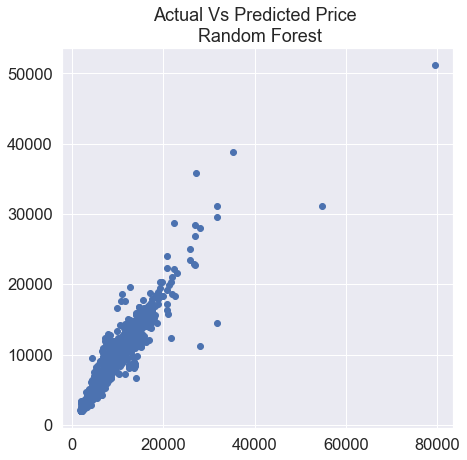

In [112]:
plt.figure(figsize = (7,7))
plt.scatter(rf_predict.Actual_Price, rf_predict.Predicted_Price, color = 'b')
plt.title('Actual Vs Predicted Price \n Random Forest');

# Conclusion

### Using various methods and techniques we got the test and train score as 91% and 98% respectively and the errors have been reduced in the random forest model.